In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
!nvidia-smi

Sat Feb  4 16:17:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls drive/MyDrive/NeuralNetwork/

find-type-of-picture-cnn-maxpooling-dropout.ipynb  train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz			   train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz


In [5]:
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist
import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
x_train = open_images("drive/MyDrive/NeuralNetwork/train-images-idx3-ubyte.gz")
x_test = open_images("drive/MyDrive/NeuralNetwork/t10k-images-idx3-ubyte.gz")

y_train = open_labels("drive/MyDrive/NeuralNetwork/train-labels-idx1-ubyte.gz")
y_test = open_labels("drive/MyDrive/NeuralNetwork/t10k-labels-idx1-ubyte.gz")

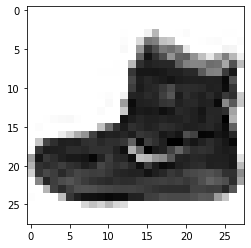

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray_r")
plt.show()

In [7]:
# generate categorical from y_train model
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(30, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation="sigmoid"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
# use different optimizer like adam, rmsprops
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 9s 13ms/step - loss: 0.9905 - accuracy: 0.6786
Epoch 2/10
60/60 [==============================] - 1s 12ms/step - loss: 0.5683 - accuracy: 0.8141
Epoch 3/10
60/60 [==============================] - 1s 12ms/step - loss: 0.4564 - accuracy: 0.8462
Epoch 4/10
60/60 [==============================] - 1s 12ms/step - loss: 0.4098 - accuracy: 0.8587
Epoch 5/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3748 - accuracy: 0.8691
Epoch 6/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3548 - accuracy: 0.8759
Epoch 7/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3386 - accuracy: 0.8809
Epoch 8/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3245 - accuracy: 0.8849
Epoch 9/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3151 - accuracy: 0.8891
Epoch 10/10
60/60 [==============================] - 1s 12ms/step - loss: 0.3069 - accuracy: 0.8916


In [10]:
Conv2D?

In [11]:
model.evaluate(x_train.reshape(-1, 28, 28, 1), y_train) # Gives accuracy from train data

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2547 - accuracy: 0.9090


[0.25466692447662354, 0.9089833498001099]

In [12]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test) # Gives accuracy from test data

313/313 [==============================] - 1s 3ms/step - loss: 0.3038 - accuracy: 0.8916


[0.3038078546524048, 0.8916000127792358]

In [13]:
p = x_test[0].reshape(1, 28, 28, 1)
p.shape

(1, 28, 28, 1)

In [14]:
# Gives the highest index of array values
np.argmax(model.predict(p))

1/1 [==============================] - 0s 86ms/step


9

In [15]:
model.predict(p)

1/1 [==============================] - 0s 15ms/step


array([[1.0873026e-04, 2.7923827e-04, 7.4284023e-04, 3.5890244e-04,
        2.7513911e-04, 8.4233433e-03, 3.6738219e-04, 4.1883957e-02,
        9.7736868e-04, 9.4658309e-01]], dtype=float32)

In [16]:
pred = model.predict(x_test.reshape(-1, 28, 28, 1))

313/313 [==============================] - 1s 2ms/step


In [17]:
# Confusion Matrix on test data
import pandas as pd

ytrue = pd.Series(np.argmax(y_test, axis = 1), name = 'actual')
ypred = pd.Series(np.argmax(pred, axis = 1), name = 'pred')

pd.crosstab(ytrue, ypred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,866,0,9,31,8,2,73,0,11,0
1,2,968,1,21,4,0,2,0,2,0
2,13,1,816,12,84,0,71,0,3,0
3,17,4,6,911,31,0,28,0,3,0
4,2,1,70,30,843,1,53,0,0,0
5,0,0,0,0,0,976,0,16,1,7
6,150,3,75,30,87,1,639,0,15,0
7,0,0,0,0,0,15,0,963,0,22
8,1,1,1,5,3,3,2,4,980,0
